In [1]:
# Importing the required modules for data analysis and data visualization
import numpy as np 
import pandas as pd
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Loading the datasets onto the dataframes
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Read the data inside the dataframes
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Learning about the size and datatypes of attributes of 'train' dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Learning about the size and datatypes of attributes of 'test' dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# Learning about the columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Printing summary statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations :
1. Total number of passengers : 891.
2. Number of people survived from 891 (mean) : 38%.
3. Most people belonged to Pclass : 3
4. Maximum Fare paid for a ticket : 512 
5. Standard deviation : 49

In [11]:
# To view categorical features
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Observations from categorical features:
1. Male is the most common sex.2. 
Cabin and ticket columns  hves many duplicate values
3. 
Embarked has three possible values with most passengers embarking from Southhampto
4. All namesers are uniques.

In [14]:
# Finding the percentage of missing values in train
train.isnull().sum()/ len(train) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [15]:
# Finding the percentage of missing values in test
test.isnull().sum()/ len(test) *100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [16]:
# Since cabin column has a high percentage of missing values, it may be dropped.

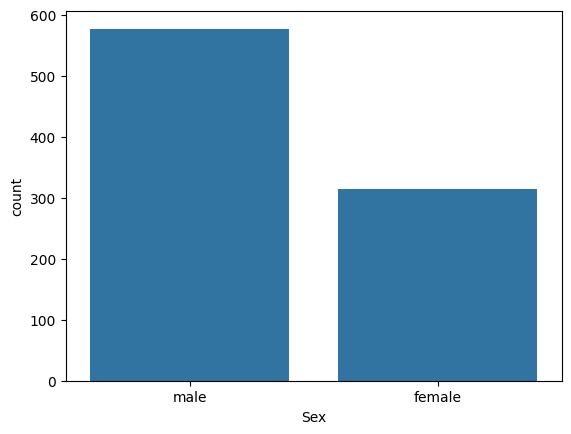

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
# Counting the number of males and females
sns.countplot(x='Sex', data=train)
plt.show()

# Display the value counts
train['Sex'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


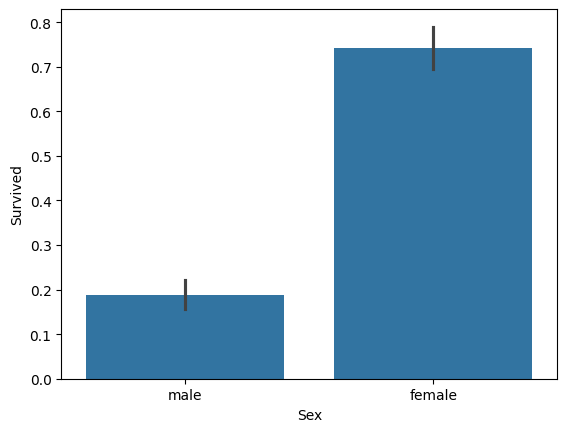

In [21]:
# Comparing the Sex feature against Survived
sns.barplot(x='Sex',y='Survived',data=train)
train.groupby('Sex',as_index=False).Survived.mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


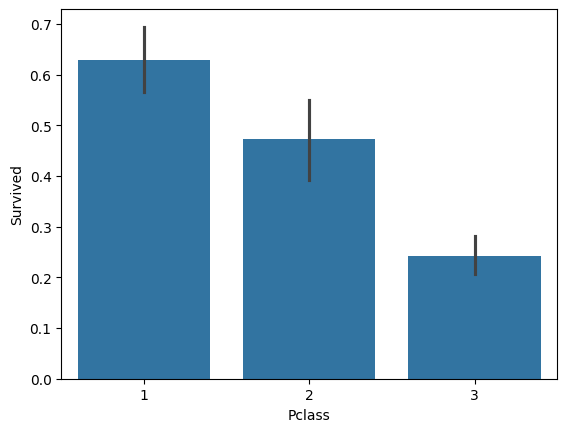

In [22]:
# Comparing the Pclass feature against Survived
sns.barplot(x='Pclass',y='Survived',data=train)
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


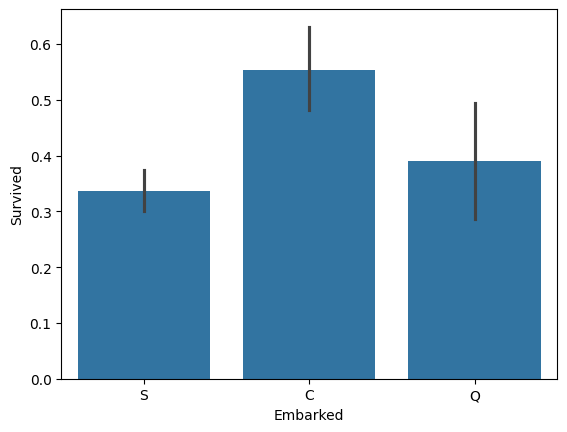

In [23]:
# Comparing the Embarked feature against Survived
sns.barplot(x='Embarked',y='Survived',data=train)
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Passengers that embarked from port Cherbourg had a higher rate of Survival at 55% (may be due to Sex or socio-economic class)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


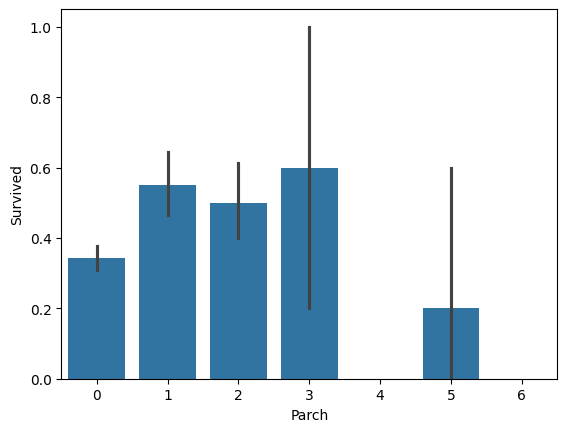

In [25]:
# Comparing the Number of Children feature against Survived
sns.barplot(x='Parch',y='Survived',data=train)
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Passengers who had either 1, 2 or 3 children had a higher possibility of surviving than the ones that had none. However having more than 3 children made the possibility even lesser.

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


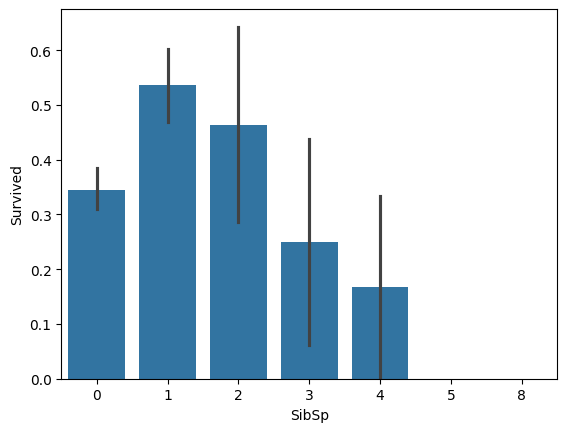

In [26]:
# Comparing the Number of Siblings/Spouse feature against Survived
sns.barplot(x='SibSp',y='Survived',data=train)
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Having a spouse or 1 sibling had a positive effect on Survival as compared to being alone. However, the chances of survival go down with the number of siblings increase beyond 1.

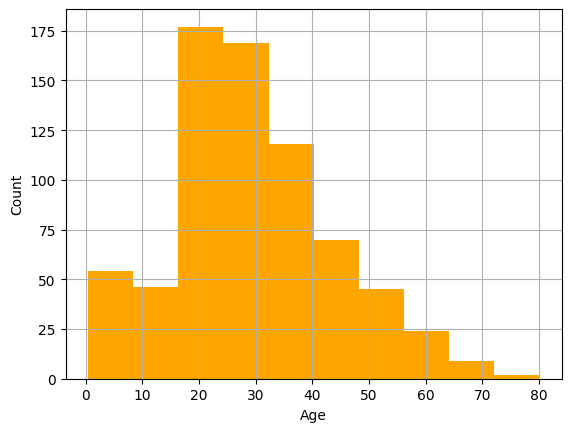

The Standard Deviation age of passengers is : 14
The Median age of passengers is : 28


In [27]:
# Plotting a histogram of the ages
train.Age.hist(bins=10,color='orange')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Standard Deviation age of passengers is :", int(train.Age.std()))
print("The Median age of passengers is :", int(train.Age.median()))

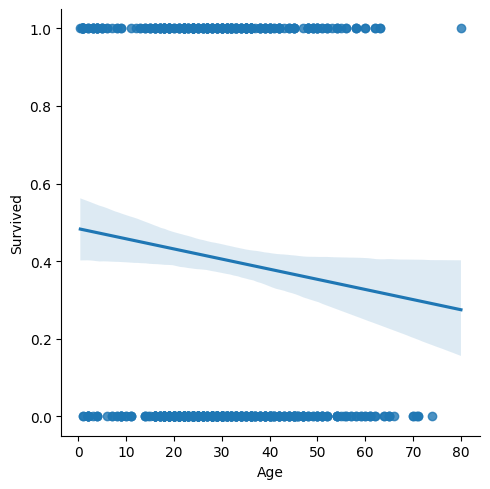

In [28]:
# Younger individuals are more likely to survive
sns.lmplot(x='Age',y='Survived',data=train,palette='Set1')

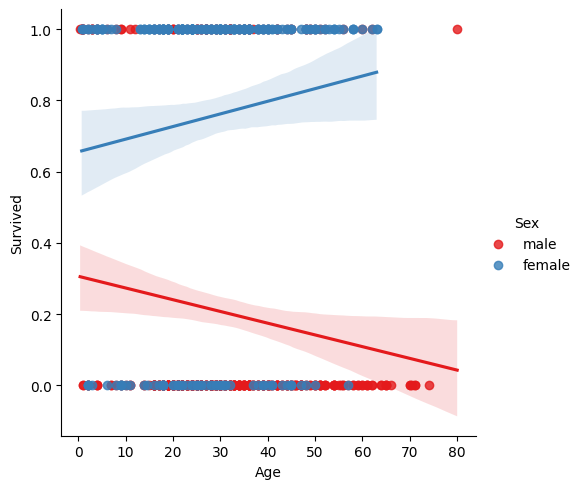

In [29]:
# Does Sex have effect on Survival
sns.lmplot(x='Age',y='Survived',data=train,hue='Sex',palette='Set1')

Age has an opposite effect on the survival of men and women. The chances of survival increase as the age of women increases.

,Sex,Age
0,female,27.0
1,male,29.0


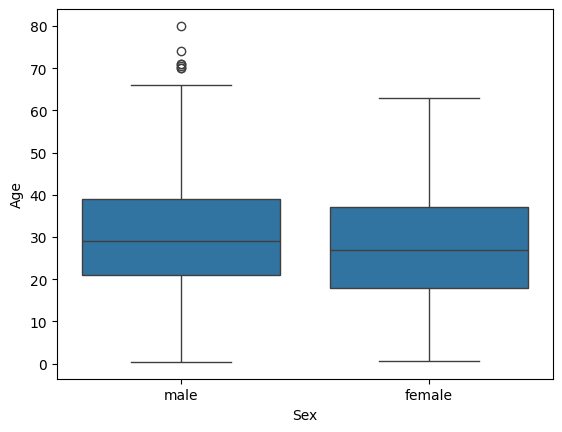

In [30]:
# Checking for outliers in Age data
sns.boxplot(x='Sex',y='Age',data=train)

# Getting the median age according to Sex
train.groupby('Sex',as_index=False)['Age'].median()

Mean value of Fare is : 32.204207968574636
Median value of Fare is : 14.4542


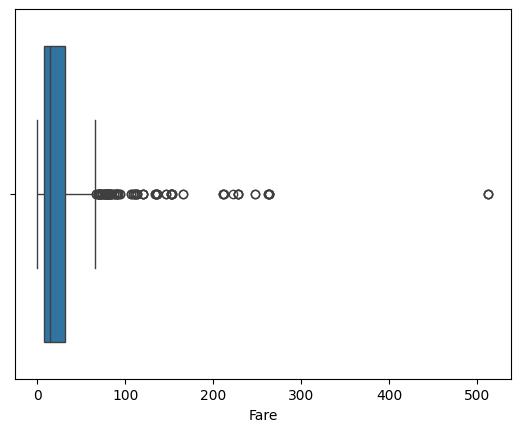

In [32]:
# Plotting the Fare column
sns.boxplot(x="Fare",data=train)

# Checking the mean and median
print("Mean value of Fare is :",train.Fare.mean())
print("Median value of Fare is :",train.Fare.median())

# Data Cleaning

In [33]:
# Dropping columns which are not required
drop_list=['Cabin','Ticket','PassengerId']

train = train.drop(drop_list,axis=1)
test_passenger = pd.DataFrame(test.PassengerId)
test = test.drop(drop_list,axis=1)

test_passenger.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [34]:
# Filling the missing Embarked values in train and test datasets with the majority ('S')
train.Embarked.fillna('S',inplace=True)
test.Embarked.fillna('S',inplace=True)

# Filling the missing values in the Age column in train and test datasets with the median age (28)
train.Age.fillna(28, inplace=True)
test.Age.fillna(28, inplace=True)

# Filling the missing values in the Fare column in the train and test datasets with the median fare
train.Fare.fillna(train.Fare.median(), inplace=True)
test.Fare.fillna(test.Fare.median(), inplace=True)

# Feature Engineering

In [35]:
# Combining the train and test dataframes to work with them simultaneously
combined = [train, test]

<Axes: xlabel='count', ylabel='Title'>

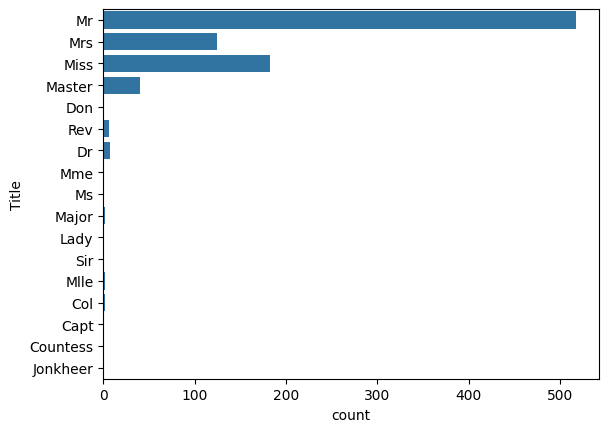

In [36]:
# Extracting the various titles in Names column
for dataset in combined:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Plotting the various titles extracted    
sns.countplot(y='Title',data=train)  

In [37]:
# Refining the title feature by merging some rare titles and correcting misspelt titles
for dataset in combined:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')

    dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    
train.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Special,0.347826
2,Mr,0.156673


<Axes: xlabel='count', ylabel='Title'>

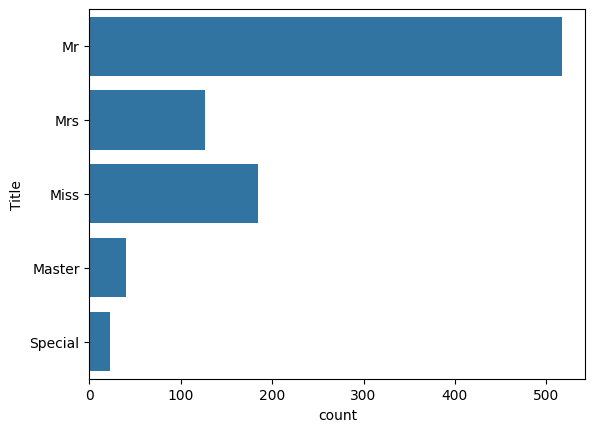

In [38]:
# Distribution of the title feature
sns.countplot(y='Title',data=train)

In [39]:
# Mapping the title names to numeric values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
for dataset in combined:
    dataset['Title'] = dataset.Title.map(title_mapping)
    dataset['Title'] = dataset.Title.fillna(0)

In [40]:
# Creating a new feature IsAlone from the SibSp and Parch columns (because being alone on the Titanic is evidently a huge disadvantage)
for dataset in combined:
    dataset["Family"] = dataset['SibSp'] + dataset['Parch']
    dataset["IsAlone"] = np.where(dataset["Family"] > 0, 0,1)
    dataset.drop('Family',axis=1,inplace=True)
    
train.head()    

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


In [41]:
# Dropping the Name,SibSP and Parch columns since they aren't necessary
for dataset in combined:
    dataset.drop(['SibSp','Parch','Name'],axis=1,inplace=True)  

In [42]:
# Creating another feature if the passenger is a child, since younger people had greater chances of survival
for dataset in combined:
    dataset["IsMinor"] = np.where(dataset["Age"] < 15, 1, 0)

In [43]:
# Creating another feature if the passenger is an old woman, since older women had greater chances of survival
train['Old_Female'] = (train['Age']>50)&(train['Sex']=='female')
train['Old_Female'] = train['Old_Female'].astype(int)

test['Old_Female'] = (test['Age']>50)&(test['Sex']=='female')
test['Old_Female'] = test['Old_Female'].astype(int)

In [44]:
# Converting categorical variables into numerical ones
train2 = pd.get_dummies(train,columns=['Pclass','Sex','Embarked'],drop_first=True)
test2 = pd.get_dummies(test,columns=['Pclass','Sex','Embarked'],drop_first=True)
train2.head()

,Survived,Age,Fare,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,0,0,False,True,True,False,True
1,1,38.0,71.2833,3,0,0,0,False,False,False,False,False
2,1,26.0,7.9250,2,1,0,0,False,True,False,False,True
3,1,35.0,53.1000,3,0,0,0,False,False,False,False,True
4,0,35.0,8.0500,1,1,0,0,False,True,True,False,True


In [45]:
# Creating Age and Fare bands
train2['AgeBands'] = pd.qcut(train2.Age,4,labels=False) 
test2['AgeBands'] = pd.qcut(test2.Age,4,labels=False) 
train2['FareBand'] = pd.qcut(train2.Fare,7,labels=False)
test2['FareBand'] = pd.qcut(test2.Fare,7,labels=False)

In [46]:
# Dropping the Age and Fare columns
train2.drop(['Age','Fare'],axis=1,inplace=True)
test2.drop(['Age','Fare'],axis=1,inplace=True)

In [47]:
train2.head()

,Survived,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,0,1,0,0,0,False,True,True,False,True,0,0
1,1,3,0,0,0,False,False,False,False,False,3,6
2,1,2,1,0,0,False,True,False,False,True,1,1
3,1,3,0,0,0,False,False,False,False,True,2,5
4,0,1,1,0,0,False,True,True,False,True,2,1


In [48]:
test2.head()

,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,1,1,0,0,False,True,True,True,False,2,1
1,3,0,0,0,False,True,False,False,True,3,0
2,1,1,0,0,True,False,True,True,False,3,2
3,1,1,0,0,False,True,True,False,True,1,2
4,3,0,0,0,False,True,False,False,True,0,2


# Machine Learning

In [49]:
# Importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [50]:
# Splitting training data into X: features and Y: target
X = train2.drop("Survived",axis=1) 
Y = train2["Survived"]

# Splitting our training data again in train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

In [53]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, Y_test) * 100, 2)
acc_logreg

80.6

In [54]:
# K-fold cross validation for logistic Regression for greater accuracy
cv_scores = cross_val_score(logreg,X,Y,cv=5)
np.mean(cv_scores)*100

80.35904839620865

In [56]:
# Decision Tree Classifier

decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, Y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 4}
Best score: 82.37838177138912


In [57]:
# Random Forest CLassifier

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, Y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 19}
Best score: 80.13370158809867


In [59]:
# Gradient Boosting Classifier

gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, Y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': 3, 'n_estimators': 16}
Best score: 82.26476680685457


In [63]:
# Storing the result
y_final = clf_cv.predict(test2)

submission = pd.DataFrame({
        "PassengerId": test_passenger["PassengerId"],
        "Survived": y_final
    })
submission.head()
submission.to_csv('titanic.csv', index=False)